<a href="https://colab.research.google.com/github/RaoSaeed836/100_Day_ML/blob/main/Handle_Numerical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [27]:
df = pd.read_csv('titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [28]:
df['Age'].isnull().sum()

np.int64(177)

In [29]:
df['Fare'].isnull().sum()

np.int64(45)

In [30]:
df['Family'].isnull().sum()

np.int64(0)

In [31]:
mean_age=df['Age'].mean()
mode_age=df['Age'].median()
mean_fare=df['Fare'].mean()
mode_fare=df['Fare'].median()

In [32]:
df['Age_Mean']=df['Age'].fillna(mean_age)
df['Age_Mode']=df['Age'].fillna(mode_age)
df['fare_Mean']=df['Fare'].fillna(mean_fare)
df['fare_Mode']=df['Fare'].fillna(mode_fare)

In [33]:
df

,Age,Fare,Family,Survived,Age_Mean,Age_Mode,fare_Mean,fare_Mode
0,22.0,7.2500,1,0,22.000000,22.0,7.250000,7.2500
1,38.0,71.2833,1,1,38.000000,38.0,71.283300,71.2833
2,26.0,7.9250,0,1,26.000000,26.0,7.925000,7.9250
3,35.0,53.1000,1,1,35.000000,35.0,53.100000,53.1000
4,35.0,8.0500,0,0,35.000000,35.0,8.050000,8.0500
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,27.000000,27.0,13.000000,13.0000
887,19.0,30.0000,0,1,19.000000,19.0,30.000000,30.0000
888,NaN,23.4500,3,0,29.699118,28.0,23.450000,23.4500
889,26.0,NaN,0,1,26.000000,26.0,32.279338,14.4542


In [34]:
print('Original Age variable variance: ', df['Age'].var())
print('Age Variance after median imputation: ', df['Age_Mode'].var())
print('Age Variance after mean imputation: ', df['Age_Mean'].var())
print('Original Fare variable variance: ', df['Fare'].var())
print('Fare Variance after median imputation: ', df['fare_Mode'].var())
print('Fare Variance after mean imputation: ', df['fare_Mean'].var())

Original Age variable variance:  211.0191247463081
Age Variance after median imputation:  169.51249827942328
Age Variance after mean imputation:  169.05239993721085
Original Fare variable variance:  2530.6730768999487
Fare Variance after median imputation:  2417.971599672526
Fare Variance after mean imputation:  2402.717696607255


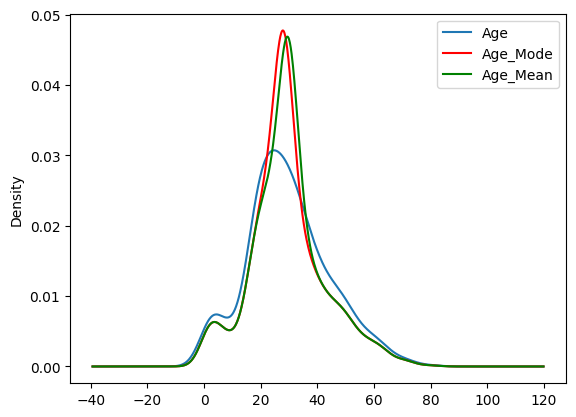

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
df['Age_Mode'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df['Age_Mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

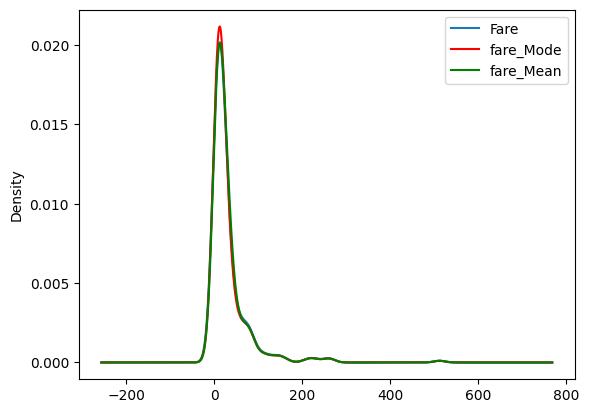

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
df['fare_Mode'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df['fare_Mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [37]:
df.cov()

,Age,Fare,Family,Survived,Age_Mean,Age_Mode,fare_Mean,fare_Mode
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,73.727862,73.196997
Fare,78.071438,2530.673077,17.460363,6.442361,62.210610,65.546143,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-5.213332,-5.159658,16.577535,16.611725
Survived,-0.551296,6.442361,0.013063,0.236772,-0.441656,-0.411226,6.116624,6.021945
Age_Mean,211.019125,62.210610,-5.213332,-0.441656,169.052400,169.052400,59.065130,58.639842
Age_Mode,211.019125,65.546143,-5.159658,-0.411226,169.052400,169.512498,62.232012,61.706696
fare_Mean,73.727862,2530.673077,16.577535,6.116624,59.065130,62.232012,2402.717697,2402.717697
fare_Mode,73.196997,2530.673077,16.611725,6.021945,58.639842,61.706696,2402.717697,2417.971600


In [38]:
df.corr()

,Age,Fare,Family,Survived,Age_Mean,Age_Mode,fare_Mean,fare_Mode
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.097273,0.096203
Fare,0.099481,1.000000,0.212626,0.263920,0.094681,0.099626,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.248512,-0.245619,0.209609,0.209378
Survived,-0.077221,0.263920,0.016639,1.000000,-0.069809,-0.064910,0.256445,0.251678
Age_Mean,1.000000,0.094681,-0.248512,-0.069809,1.000000,0.998642,0.092676,0.091718
Age_Mode,1.000000,0.099626,-0.245619,-0.064910,0.998642,1.000000,0.097513,0.096384
fare_Mean,0.097273,1.000000,0.209609,0.256445,0.092676,0.097513,1.000000,0.996841
fare_Mode,0.096203,1.000000,0.209378,0.251678,0.091718,0.096384,0.996841,1.000000


<Axes: >

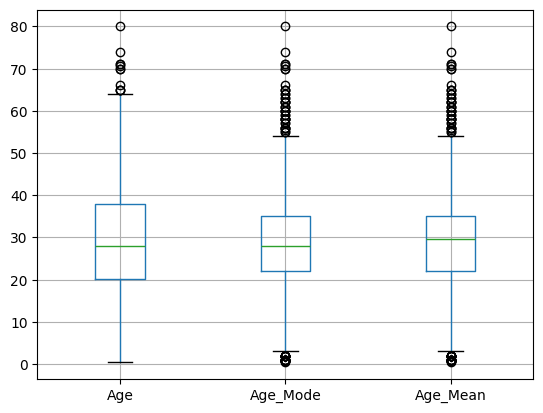

In [39]:
df[['Age', 'Age_Mode', 'Age_Mean']].boxplot()


## in Sklearn these work look like these

In [40]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [42]:
X_train.shape, X_test.shape


((712, 7), (179, 7))

In [43]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [44]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')


In [45]:
trf.fit(X_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [46]:
trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [47]:
trf.named_transformers_['imputer2'].statistics_


array([32.61759689])

In [48]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)